## Step 0: Latent Dirichlet Allocation ##

LDA is used to classify text in a document to a particular topic. It builds a topic per document model and words per topic model, modeled as Dirichlet distributions. 

* Each document is modeled as a multinomial distribution of topics and each topic is modeled as a multinomial distribution of words.
* LDA assumes that the every chunk of text we feed into it will contain words that are somehow related. Therefore choosing the right corpus of data is crucial. 
* It also assumes documents are produced from a mixture of topics. Those topics then generate words based on their probability distribution. 

## Step 1: Load the dataset

The dataset we'll use is a the government report of 2018. We'll start by loading it from web crawler.

In [1]:
from html_utils import html_parse
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from utils import plot_word_cloud,print_top_words
import matplotlib.pyplot as plt
import numpy as np
import pyLDAvis
import pyLDAvis.sklearn

In [2]:
all_reports_url = 'http://www.gov.cn/guowuyuan/baogao.htm'
x = html_parse(gov_url=all_reports_url)

Building prefix dict from /Users/chenanyi/anaconda3/lib/python3.6/site-packages/jieba/dict.txt ...
Loading model from cache /var/folders/v7/ckl8j7nx6n166wtl69knwjjw0000gn/T/jieba.cache
Loading model cost 1.2553157806396484 seconds.
Prefix dict has been built succesfully.


Finish 10 files
Finish 20 files
Finish 30 files
Finish 40 files
Finish 50 files


## Step 2: Word Cloud

We need to use 'word cloud' method to visualize the data and check the difference.

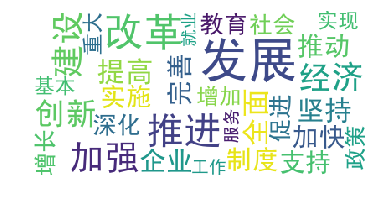

In [3]:
# 2018 government work report
plot_word_cloud(x.corpus[0],max_words = 30)

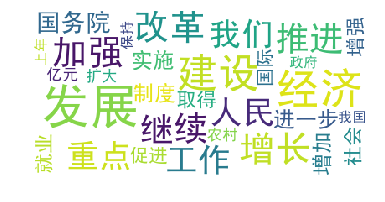

In [4]:
# 2009 government work report
plot_word_cloud(x.corpus[9],max_words = 30)

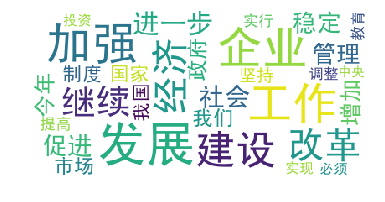

In [5]:
# 1999 government work report
plot_word_cloud(x.corpus[19],max_words = 30)

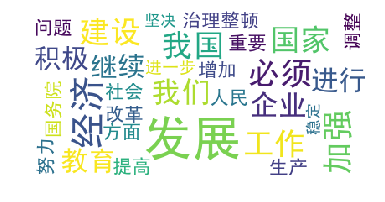

In [6]:
# 1989 government work report
plot_word_cloud(x.corpus[29],max_words = 30)

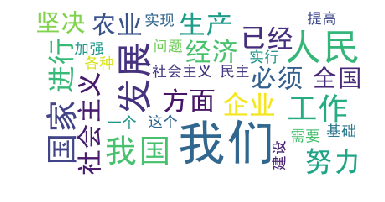

In [7]:
# 1979 government work report
plot_word_cloud(x.corpus[39],max_words = 30)

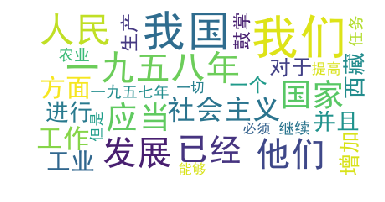

In [8]:
# 1959 government work report
plot_word_cloud(x.corpus[44],max_words = 30)

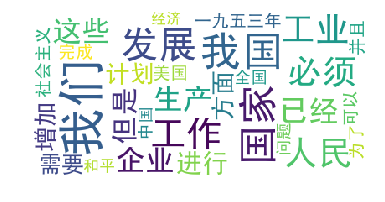

In [9]:
# 1954 government work report
plot_word_cloud(x.corpus[-1],max_words = 30)

We can see from the plot that, the trend of work is very clear.

## Step 3: LDA

LDA model has serval hyper-parameter. Like the number of topics, the training epoches, training method "online" and "batch", and so on. I compare different combination and select the optimal one. 

In [10]:
# LDA
n_features = 1000
# Load stop word
stop_word_txt ="中文停用词表.txt"
with open(stop_word_txt, 'rb') as fp:
    stopword = fp.read().decode('utf-8')  
stopword_list = stopword.splitlines() 

In [11]:
tf_vectorizer = CountVectorizer(stop_words= stopword_list,max_features=n_features)
tf = tf_vectorizer.fit_transform(x.corpus)

In [12]:
tf_array = tf.toarray()
print(tf_array.shape)

(50, 1000)


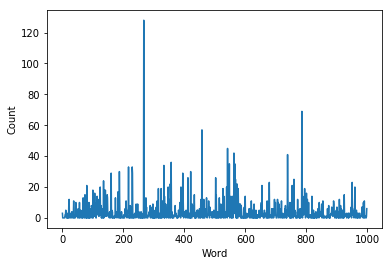

In [13]:
# Plot the BoW feature vector for a document
plt.plot(tf_array[5,:])
plt.xlabel('Word')
plt.ylabel('Count')
plt.show()

### Zipf's law

[Zipf's law](https://en.wikipedia.org/wiki/Zipf%27s_law), named after the famous American linguist George Zipf, is an empirical law stating that given a large collection of documents, the frequency of any word is inversely proportional to its rank in the frequency table. So the most frequent word will occur about twice as often as the second most frequent word, three times as often as the third most frequent word, and so on. In the figure below we plot number of appearances of each word in our training set against its rank.

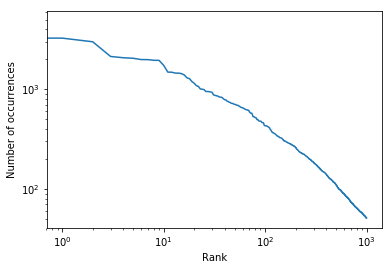

In [14]:
# Find number of occurrences for each word in the training set
word_freq = tf_array.sum(axis=0)
# Sort it in descending order
sorted_word_freq = np.sort(word_freq)[::-1]
# Plot 
plt.plot(sorted_word_freq)
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
plt.xlabel('Rank')
plt.ylabel('Number of occurrences')
plt.show()

In [15]:
n_topics = 5
lda = LatentDirichletAllocation(n_components=n_topics, max_iter=100,learning_method='batch')
lda.fit(tf) 

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=100, mean_change_tol=0.001,
             n_components=5, n_jobs=1, n_topics=None, perp_tol=0.1,
             random_state=None, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [16]:
# Get feature name
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words= 15)

Topic #0:
发展 建设 推进 经济 改革 加强 加快 实施 政府 社会 工作 提高 促进 就业 增长

Topic #1:
发展 建设 经济 加强 工作 继续 改革 企业 社会 积极 进一步 政府 稳定 国家 市场

Topic #2:
人民 社会主义 我国 国家 发展 建设 工作 必须 进行 革命 一个 中国 群众 领导 已经

Topic #3:
增长 工业 生产 农业 建设 增加 计划 国家 企业 发展 五年计划 完成 方面 全国 达到

Topic #4:
经济 发展 企业 改革 建设 我国 生产 必须 国家 工作 提高 人民 方面 增长 进行



## Step 4: Visualization for Result

I used plLDAvis package to visualize our LDA model. Each circle is a topic. The size of the circle represents the number of documents under this topic. The union area of two circles is similarity of two topics.

In [17]:
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda, tf, tf_vectorizer)

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
1      25.826214        1       1 -0.092360 -0.003162
0      25.520199        1       2 -0.140790 -0.072082
4      22.189002        1       3  0.016034  0.004425
2      16.704199        1       4  0.032085  0.154402
3       9.760387        1       5  0.185032 -0.083583, topic_info=     Category         Freq  Term        Total  loglift  logprob
term                                                           
416   Default   943.000000    工业   943.000000  30.0000  30.0000
706   Default  1444.000000    生产  1444.000000  29.0000  29.0000
740   Default  1732.000000  社会主义  1732.000000  28.0000  28.0000
357   Default  1478.000000    增长  1478.000000  27.0000  27.0000
100   Default  1942.000000    人民  1942.000000  26.0000  26.0000
857   Default   866.000000    计划   866.000000  25.0000  25.0000
183   Default  1295.000000    农业  1295.000000  24.0000  24.0000
354   Default  1383.000000    增加  1383.000000  23.0000  23.0000
542   Default   999.000000    推进   999.000000  22.0000  22.0000
503   Default  1978.000000    我国  1978.000000  21.0000  21.0000
81    Default   337.000000  五年计划   337.000000  20.0000  20.0000
315   Default  2062.000000    国家  2062.000000  19.0000  19.0000
390   Default   477.000000    完成   477.000000  18.0000  18.0000
982   Default   335.000000    革命   335.000000  17.0000  17.0000
114   Default  1975.000000    企业  1975.000000  16.0000  16.0000
432   Default   642.000000    已经   642.000000  15.0000  15.0000
209   Default   345.000000    创新   345.000000  14.0000  14.0000
563   Default  2040.000000    改革  2040.000000  13.0000  13.0000
23    Default   284.000000    万吨   284.000000  12.0000  12.0000
587   Default  1064.000000    方面  1064.000000  11.0000  11.0000
349   Default   273.000000  基本建设   273.000000  10.0000  10.0000
395   Default   613.000000    实施   613.000000   9.0000   9.0000
976   Default   572.000000    需要   572.000000   8.0000   8.0000
412   Default   463.000000    就业   463.000000   7.0000   7.0000
480   Default  1271.000000    必须  1271.000000   6.0000   6.0000
913   Default   529.000000    达到   529.000000   5.0000   5.0000
552   Default   214.000000    支出   214.000000   4.0000   4.0000
103   Default   516.000000    亿元   516.000000   3.0000   3.0000
230   Default   837.000000    加快   837.000000   2.0000   2.0000
91    Default   478.000000    产品   478.000000   1.0000   1.0000
...       ...          ...   ...          ...      ...      ...
911    Topic5    55.837709   轻工业    99.279665   1.7513  -5.9192
23     Topic5   156.287645    万吨   284.020139   1.7295  -4.8899
390    Topic5   244.792286    完成   477.695972   1.6583  -4.4412
416    Topic5   450.597332    工业   943.489553   1.5878  -3.8311
857    Topic5   389.832846    计划   866.304659   1.5283  -3.9759
852    Topic5   125.554043    规定   248.325911   1.6448  -5.1089
183    Topic5   442.615844    农业  1295.255160   1.2531  -3.8489
706    Topic5   449.231077    生产  1444.451750   1.1589  -3.8341
357    Topic5   452.618997    增长  1478.684224   1.1430  -3.8266
354    Topic5   399.719670    增加  1383.315364   1.0854  -3.9509
913    Topic5   183.072649    达到   529.826148   1.2642  -4.7317
248    Topic5   120.015428    单位   294.169681   1.4303  -5.1540
28     Topic5   117.643736    上年   289.244545   1.4272  -5.1740
976    Topic5   173.601110    需要   572.589019   1.1334  -4.7849
91     Topic5   153.350090    产品   478.234335   1.1895  -4.9089
458    Topic5   403.964295    建设  3245.527893   0.2431  -3.9403
587    Topic5   222.539008    方面  1064.270187   0.7619  -4.5365
155    Topic5   205.580396    全国   947.820378   0.7985  -4.6158
432    Topic5   168.426228    已经   642.106437   0.9886  -4.8151
114    Topic5   278.880025    企业  1975.638189   0.3690  -4.3108
315    Topic5   280.240706    国家  2062.245169   0.3309  -4.3060
330    Topic5   165.993263    地方   687.306019   0.9060  -4.8297
188    Topic5   136.884710    农民   513.155523   1.0054  -5.